<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [15]:
# import requests
# import io

# URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await requests.get(URL)
# boston_url = io.BytesIO((await resp.text).to_py())

In [19]:
boston_df=pd.read_csv('boston_housing.csv')
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [20]:
boston_df.drop(columns=['Unnamed: 0'], inplace=True) #Dropping the unnecessary column 

## Task 1: Become Familiar with the Dataset 

In [21]:
boston_df ## Display the Boston Housing Dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [22]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [23]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 1.1 Feature Distribution

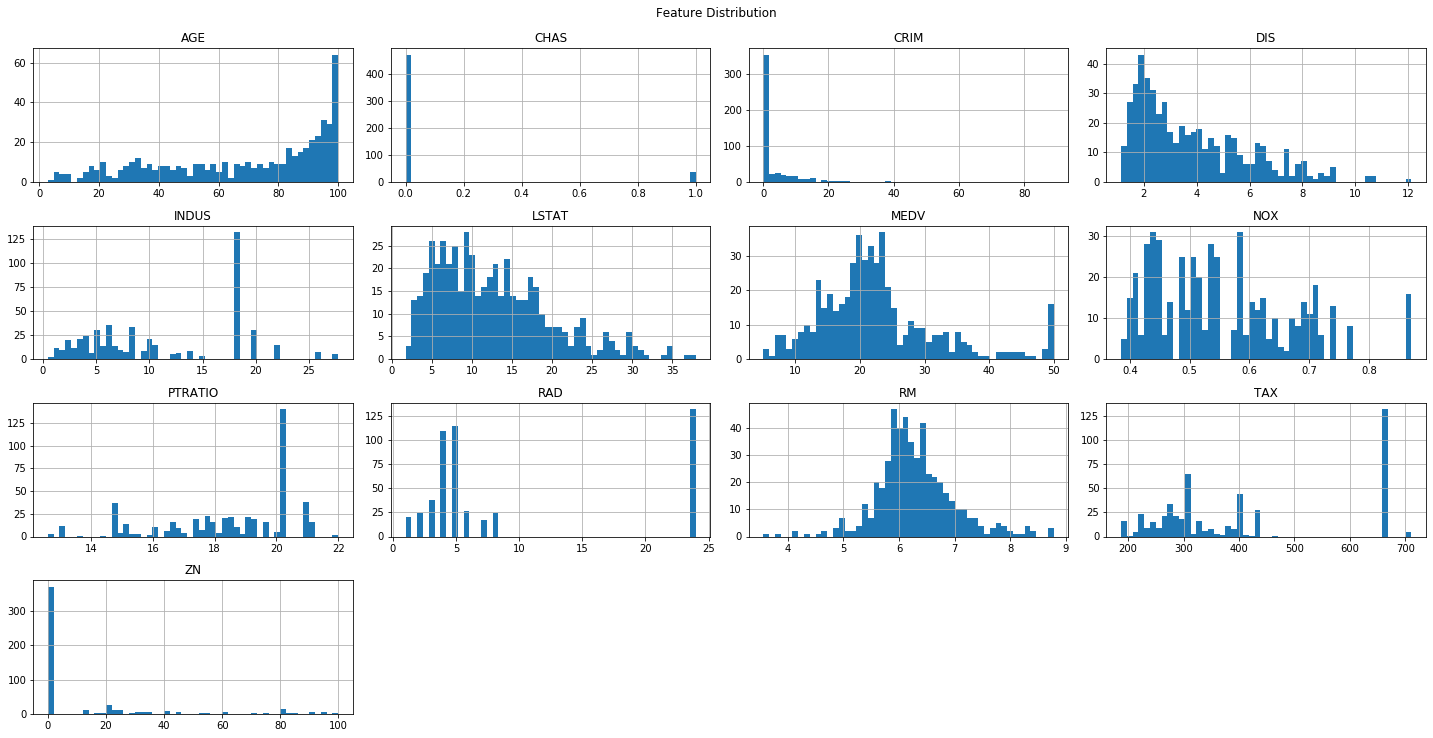

In [24]:
boston_df.hist(bins=50, figsize=(20,10))
pyplot.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
pyplot.tight_layout()
pyplot.show()

<Figure size 1440x1440 with 0 Axes>

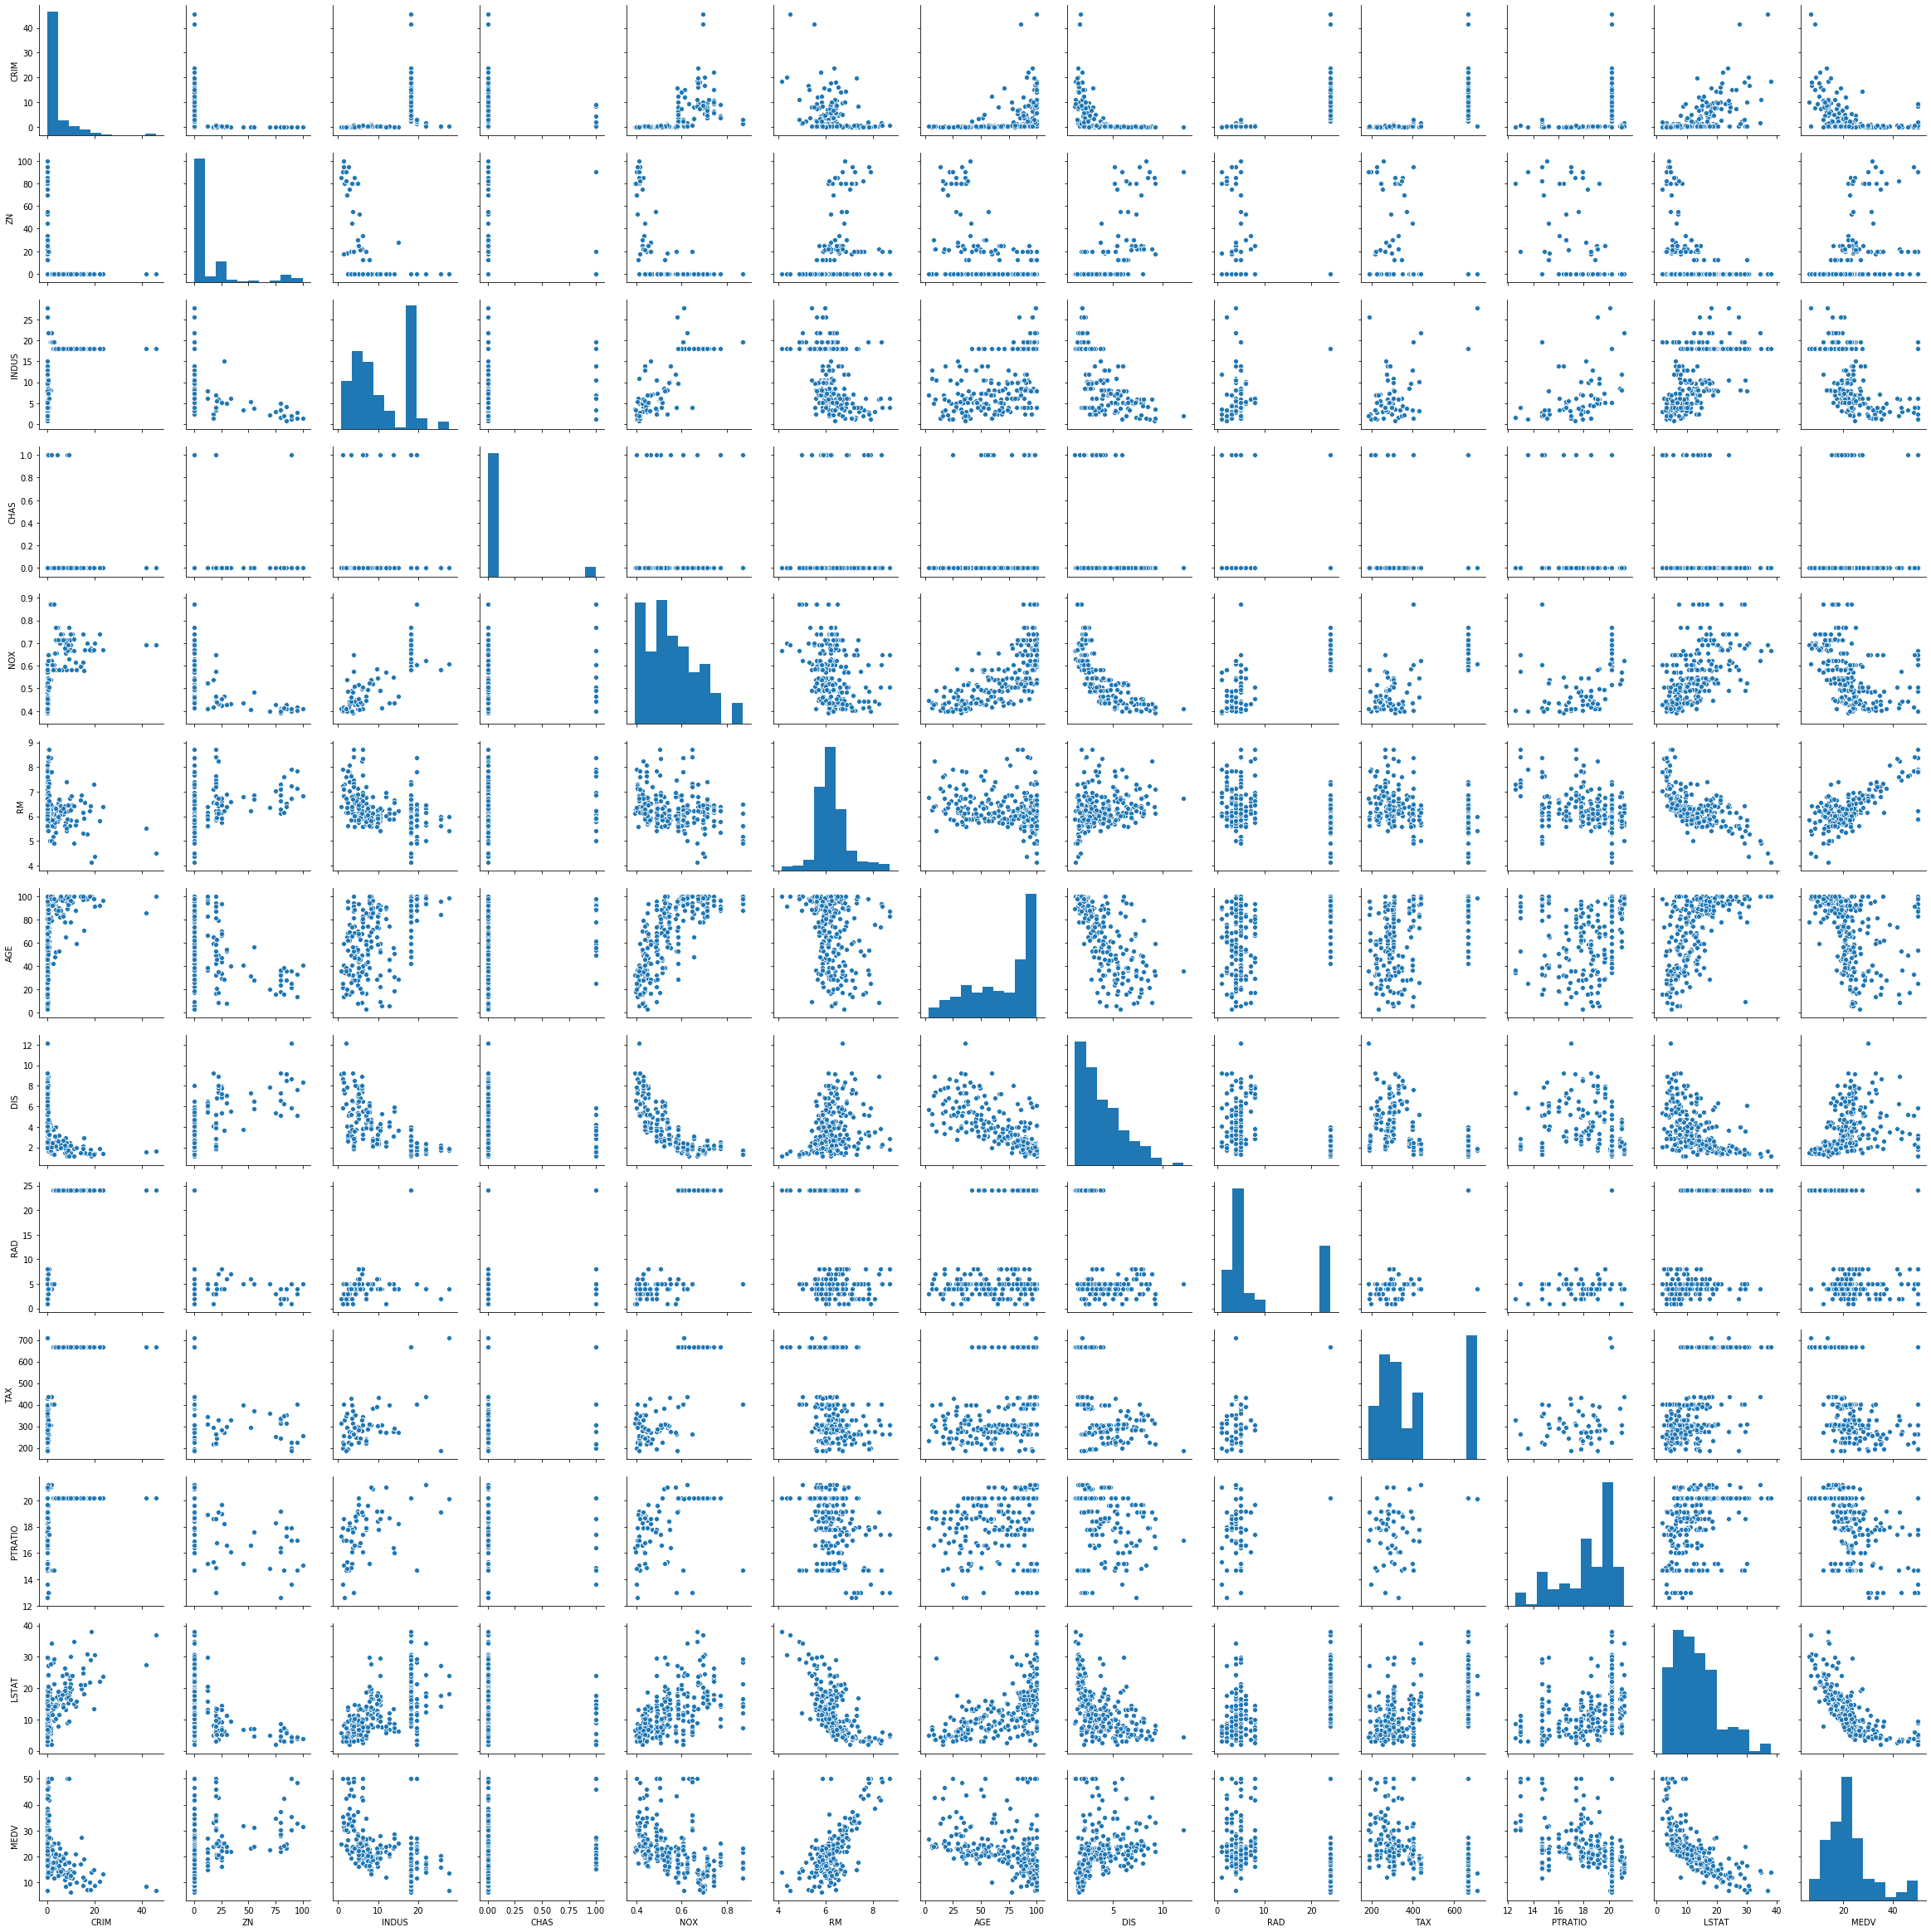

In [25]:
pyplot.figure(figsize=(20,20))
pyplot.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(boston_df.sample(250))
pyplot.show()

## Task 2: Generate Descriptive Statistics and Visualizations
### 2.1 Median value of owner-occupied homes

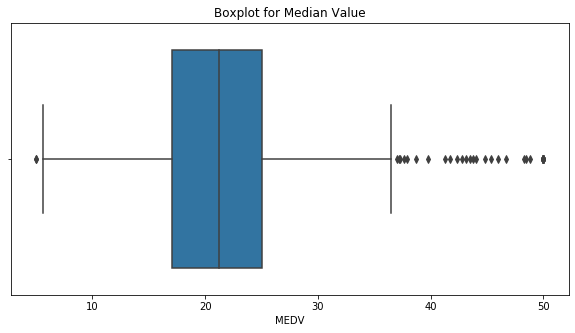

In [26]:
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
pyplot.title("Boxplot for Median Value")
pyplot.show()

Note: Outliers after third quartile.

### 2.2 Provide a  bar plot for the Charles river variable

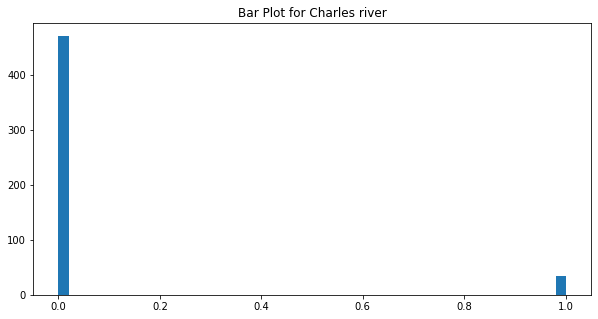

In [29]:
pyplot.figure(figsize=(10,5))
pyplot.hist(boston_df['CHAS'],50)
pyplot.title("Bar Plot for Charles river")
pyplot.show()

Note: Majority tracts don't bound Charles River

### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable

In [30]:
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

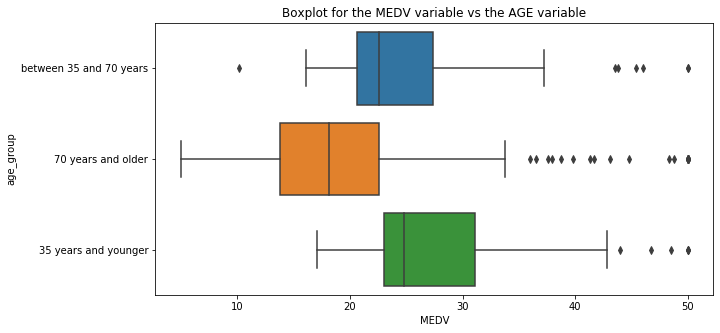

In [31]:
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

Note: 35 years or younger group pays the highest median house price while above 70s are shifting to cheaper houses

### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

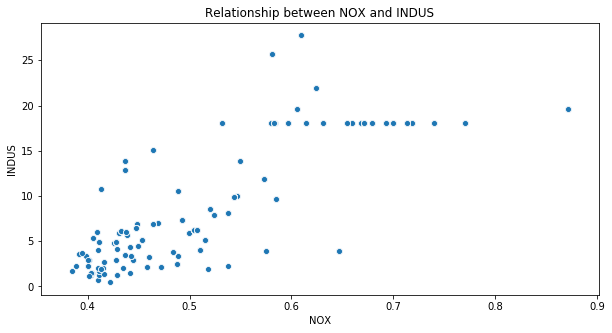

In [32]:
pyplot.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
pyplot.title("Relationship between NOX and INDUS")
pyplot.show()

Note: It seems, there is a linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town, but this relatioship is oberved till the NOX value of 0.6

### 2.5 Create a histogram for the pupil to teacher ratio variable

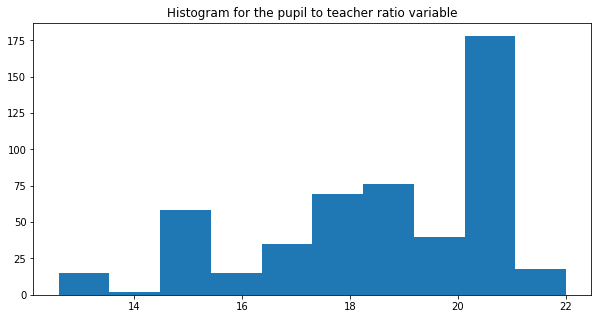

In [34]:
pyplot.figure(figsize=(10,5))
pyplot.hist(boston_df['PTRATIO'],bins=10)
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.show()

## Task 3: Use the appropriate tests to answer the questions provided
### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? 

T-test for independent samples

Null Hypothesis($H_{0}$): Both average MEDV are the same

Alternative Hypothesis($H_{a}$): Both average MEDV are NOT the same

In [35]:
boston_df["CHAS"].value_counts()
CHAS0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
CHAS1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]
scipy.stats.ttest_ind(CHAS0,CHAS1,axis=0,equal_var=True)


Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

From test 3.1 Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.

### 3.2  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

State the hypothesis:

$H_{0}: µ_{1} = µ_{2} = µ_{3} $(the three population means are equal)

$H_{a}: $ At least one of the means differ

In [37]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
f_stats, p_value = scipy.stats.f_oneway(low,mid,high)

print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))


F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


From 3.2 since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.

### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

$H_{0}:$ NOX is not correlated with INDUS

$H_{a}:$ NOX is correlated with INDUS

In [38]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))


Pearson Coefficient value=0.763651446920915, P-value=7.913361061239593e-98


Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

State the Hypothesis:

$H_{0} :$ weighted distances to five Boston employment centres are not related to median value

$H_{a} :$ weighted distances to five Boston employment centres are related to median value

In [39]:
median_value = boston_df['MEDV']
distance = boston_df['DIS']
distance = sm.add_constant(distance)
results = sm.OLS(median_value,distance).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        12:29:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
np.sqrt(0.062)  ##Pearson Coeffiecent valuea
"""The square root of R-squared is 0.25, which implies weak correlation between both features"""

'The square root of R-squared is 0.25, which implies weak correlation between both features'

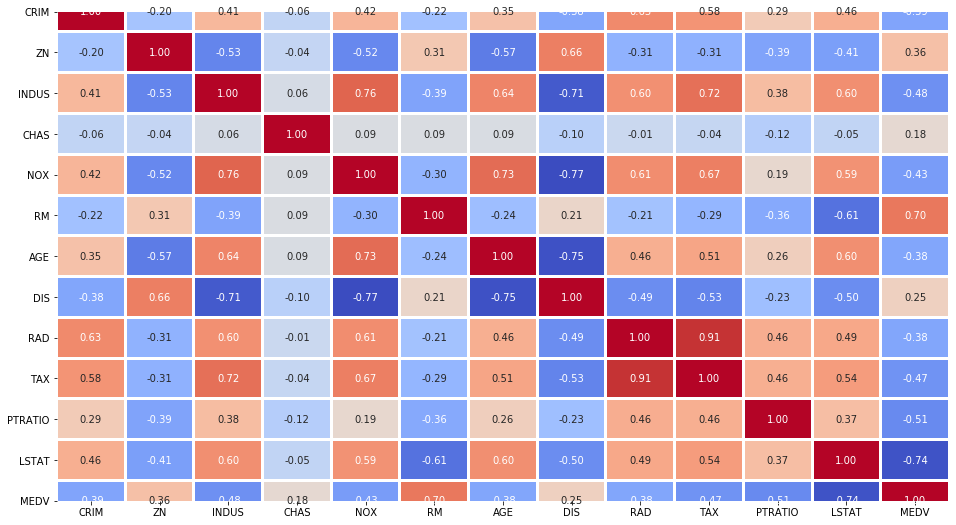

In [41]:
pyplot.figure(figsize=(16,9))
sns.heatmap(boston_df.drop(columns=['age_group']).corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
pyplot.show()